webf NOT subset; don't know how to subset; dropped


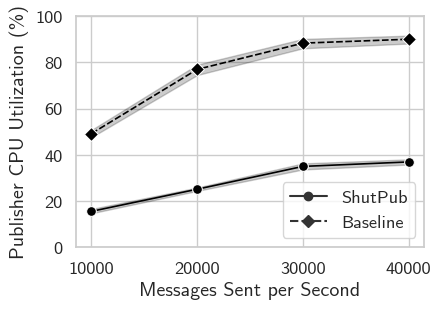

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
from scipy.signal import find_peaks
import seaborn as sns

sns.set(font_scale=1.2, style='whitegrid', font='CMU Sans Serif', rc={'figure.figsize':(4.5,3)})

rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
rcParams['figure.dpi'] = 100
rcParams['axes.unicode_minus'] = False

file_set = {
    # 70000:[
    #     '/Users/minghe/Desktop/0911terraform/publisher/70000.csv',
    # ],
    # 60000:[
    #     '/Users/minghe/Desktop/0911terraform/publisher/baseline_60000.csv',
    #     '/Users/minghe/Desktop/0911terraform/publisher/60000.csv',
    # ],
    #"mi20"
    # 50000:[
    #     '/Users/minghe/Desktop/0911terraform/publisher/mi20.csv',
    #     '/Users/minghe/Desktop/0911terraform/publisher/sameRegion/baseline_mi20.csv',
    # ],
    # 60000:[
    #     'log/0911terraform/publisher/baseline_60000.csv',
    #     'log/0911terraform/publisher/60000.csv',
    # ],
    # # "mi20"
    # 50000:[
    #     'log/0911terraform/publisher/mi20.csv',
    #     'log/0911terraform/publisher/sameRegion/baseline_mi20.csv',
    # ],
    # "mi25"
    40000:[
        'log/0911terraform/publisher/mi25.csv',
        'log/0911terraform/publisher/sameRegion/baseline_mi25.csv',

    ],

    # "mi33"
    30000:[
        'log/0911terraform/publisher/mi33.csv',
        'log/0911terraform/publisher/sameRegion/baseline_mi33.csv',
    ],
    # "mi50"
    20000:[
        'log/0911terraform/publisher/mi50.csv',
        'log/0911terraform/publisher/sameRegion/baseline_mi50.csv',
    ],
    # "mi100"
    10000:[
        'log/0911terraform/publisher/mi100.csv',
        'log/0911terraform/publisher/sameRegion/baseline_mi100.csv',
    ],

    # # "mi200"
    # 5000:[
    #     'log/0911terraform/publisher/sameRegion/mi200.csv',
    #     'log/0911terraform/publisher/sameRegion/baseline_mi200.csv',
    # ],

}

dfs = []

for mi, file_paths in file_set.items():
    for file_path in file_paths:
        df = pd.read_csv(file_path)
        mi_broker = df.copy()
        mi_broker['timestamp'] = mi_broker['Unix Time'] - mi_broker['Unix Time'][0]
        mi_broker['messageInterval'] = mi

        if "baseline" in file_path:
            mi_broker['type'] = "baseline"
        else:
            mi_broker['type'] = "psf"

        dfs.append(mi_broker)

merged_df = pd.concat(dfs)

style_dict={'psf':'_', 'baseline':'__'}

g = sns.lineplot(data=merged_df, x='messageInterval', y='CPU Utilization (%)', markers=["o", "D"], style='type', errorbar=("ci",95), style_order=['psf', 'baseline'],hue_order=['psf', 'baseline'], color='black', markersize=7, linewidth=1.2)

# g.title("Publisher Strain with Message Frequency", fontsize=26)

g.set_xlabel('Messages Sent per Second') #, fontsize=28)
g.set_ylabel('Publisher CPU Utilization (%)')#, fontsize=28)
g.set_ylim(0,100)

legend= plt.legend()
legend_labels = legend.texts

for label in legend_labels:
    if label.get_text() == 'psf':
        label.set_text('ShutPub')
    if label.get_text() == 'baseline':
        label.set_text('Baseline')

plt.savefig('publisher_strain_lineplot_10000_40000_notitle.pdf', bbox_inches='tight')

In [92]:
merged_df.dtypes

Time                    object
Unix Time                int64
CPU Utilization (%)    float64
RAM Utilization (%)    float64
timestamp                int64
messageInterval          int64
type                    object
dtype: object

In [1]:
merged_df[merged_df['type'] == 'baseline'][merged_df[merged_df['type'] == 'baseline']['messageInterval']==5000]['CPU Utilization (%)'].describe()


NameError: name 'merged_df' is not defined

In [14]:
merged_df[merged_df['type'] == 'psf'][merged_df[merged_df['type'] == 'psf']['messageInterval']==40000]['CPU Utilization (%)'].describe()


count    297.000000
mean      36.931010
std       10.556931
min        0.000000
25%       37.110000
50%       38.580000
75%       40.300000
max       73.740000
Name: CPU Utilization (%), dtype: float64

In [10]:
merged_df[merged_df['type'] == 'baseline'][merged_df[merged_df['type'] == 'baseline']['messageInterval']==10000]['CPU Utilization (%)'].describe()
# count    296.000000
# mean      72.373007
# std       13.221861
# min        0.000000
# 25%       73.322500
# 50%       74.680000
# 75%       76.147500
# max       96.980000

merged_df[merged_df['type'] == 'baseline'][merged_df[merged_df['type'] == 'baseline']['messageInterval']==20000]['CPU Utilization (%)'].describe()
# count    294.000000
# mean      89.352857
# std       16.066139
# min        0.000000
# 25%       91.250000
# 50%       92.420000
# 75%       93.430000
# max       99.500000

merged_df[merged_df['type'] == 'baseline'][merged_df[merged_df['type'] == 'baseline']['messageInterval']==30000]['CPU Utilization (%)'].describe()
# count    295.000000
# mean      89.796542
# std       16.519944
# min        0.000000
# 25%       91.730000
# 50%       92.960000
# 75%       93.910000
# max      100.000000


merged_df[merged_df['type'] == 'baseline'][merged_df[merged_df['type'] == 'baseline']['messageInterval']==40000]['CPU Utilization (%)'].describe()
# count    294.000000
# mean      89.819082
# std       17.354395
# min        0.000000
# 25%       92.510000
# 50%       93.415000
# 75%       94.322500
# max       99.490000

merged_df[merged_df['type'] == 'baseline'][merged_df[merged_df['type'] == 'baseline']['messageInterval']==50000]['CPU Utilization (%)'].describe()
# count    295.000000
# mean      90.162508
# std       16.553592
# min        0.000000
# 25%       92.420000
# 50%       93.400000
# 75%       93.985000
# max      100.000000

merged_df[merged_df['type'] == 'baseline'][merged_df[merged_df['type'] == 'baseline']['messageInterval']==60000]['CPU Utilization (%)'].describe()
# count    294.000000
# mean      90.393844
# std       14.369705
# min        0.000000
# 25%       91.280000
# 50%       92.890000
# 75%       93.940000
# max       99.500000


merged_df[merged_df['type'] == 'baseline'][merged_df[merged_df['type'] == 'baseline']['messageInterval']==30000]['CPU Utilization (%)'].describe()


count    294.000000
mean      88.358503
std       17.382704
min        0.000000
25%       90.920000
50%       91.880000
75%       92.490000
max      100.000000
Name: CPU Utilization (%), dtype: float64

In [91]:
merged_df[merged_df['type'] == 'psf'][merged_df[merged_df['type'] == 'psf']['messageInterval']==70000]['CPU Utilization (%)'].describe()
# count    295.000000
# mean      64.081729
# std       14.563449
# min        0.000000
# 25%       62.050000
# 50%       63.590000
# 75%       65.280000
# max       95.050000

merged_df[merged_df['type'] == 'psf'][merged_df[merged_df['type'] == 'psf']['messageInterval']==50000]['CPU Utilization (%)'].describe()
# count    296.000000
# mean      44.098074
# std       11.774398
# min        0.000000
# 25%       44.790000
# 50%       46.545000
# 75%       47.760000
# max       88.560000
merged_df[merged_df['type'] == 'psf'][merged_df[merged_df['type'] == 'psf']['messageInterval']==40000]['CPU Utilization (%)'].describe()
# count    297.000000
# mean      36.931010
# std       10.556931
# min        0.000000
# 25%       37.110000
# 50%       38.580000
# 75%       40.300000
# max       73.740000
merged_df[merged_df['type'] == 'psf'][merged_df[merged_df['type'] == 'psf']['messageInterval']==30000]['CPU Utilization (%)'].describe()
# count    297.000000
# mean      34.997879
# std       11.279441
# min        0.000000
# 25%       31.790000
# 50%       33.330000
# 75%       35.000000
# max       75.900000
merged_df[merged_df['type'] == 'psf'][merged_df[merged_df['type'] == 'psf']['messageInterval']==20000]['CPU Utilization (%)'].describe()
# count    297.000000
# mean      25.117340
# std        6.625015
# min        0.000000
# 25%       23.830000
# 50%       25.130000
# 75%       26.260000
# max       68.690000

merged_df[merged_df['type'] == 'psf'][merged_df[merged_df['type'] == 'psf']['messageInterval']==10000]['CPU Utilization (%)'].describe()
# count    297.000000
# mean      15.545926
# std        7.948594
# min        0.000000
# 25%       12.890000
# 50%       14.210000
# 75%       15.150000
# max       56.160000


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: CPU Utilization (%), dtype: float64